In [ ]:
from  google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/econ4130
### save and load data using pickle
import pickle
def psave(dataframe, fname):
    with open('{}.pkl'.format(fname),'wb') as pickle_file:
        pickle.dump(dataframe,pickle_file)
        
def pload(fname):
  
  with open('{}.pkl'.format(fname),'rb') as pickle_file:
      dataframe=pickle.load(pickle_file)
      return dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

Mounted at /content/drive
/content/drive/My Drive/econ4130


Targets Split

In [ ]:
dv=pload('DV_FROM19999TO2020')
target1 =dv['3M']['2003-12-15':'2019-01-02']
target2 =dv['2Y']['2003-12-15':'2019-01-02']
target3 =dv['5Y']['2003-12-15':'2019-01-02']
target4 =dv['10Y']['2003-12-15':'2019-01-02']
target5 =dv['30Y']['2003-12-15':'2019-01-02']

In [ ]:
###2644 is the 70/30 split index
Y_train1 = target1[:2644].values
Y_test1 = target1[2644:].values
Y_train2 = target2[:2644].values
Y_test2 = target2[2644:].values
Y_train3 = target3[:2644].values
Y_test3 = target3[2644:].values
Y_train4 = target4[:2644].values
Y_test4 = target4[2644:].values
Y_train5 = target5[:2644].values
Y_test5 = target5[2644:].values
###Y_trainT,Y_testT follows the order of ['3M','2Y','5Y','10Y','30Y']
Y_trainT=[Y_train1,Y_train2,Y_train3,Y_train4,Y_train5]
Y_testT=[Y_test1,Y_test2,Y_test3,Y_test4,Y_test5]

In [ ]:
psave(Y_trainT,'Y_trainT')
psave(Y_testT,'Y_testT')

Features Split and Normalization

In [ ]:
###normalize 1-day lagged data for feature selection
all=pload('final2_1')['2003-12-15':'2019-01-02'].dropna(axis=1)
print(all.shape)
X_train = all[:2644]
X_test = all[2644:]
###normalize X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_minmax = scaler.transform(X_train)
X_test_minmax = scaler.transform(X_test)
###save results
psave(X_train_minmax,'X_train_minmax1')
psave(X_test_minmax,'X_test_minmax1')


(3767, 256)


In [ ]:
###normalize 1 to 3 day lagged data for machine learning
all=pload('final2_3')['2003-12-15':'2019-01-02'].dropna(axis=1)
print(all.shape)
X_train = all[:2644]
X_test = all[2644:]
###normalize X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_minmax = scaler.transform(X_train)
X_test_minmax = scaler.transform(X_test)
###save results
psave(X_train_minmax,'X_train_minmax3')
psave(X_test_minmax,'X_test_minmax3')

(3767, 768)


Lasso Feature Selection

In [ ]:
X_train_minmax=pload('X_train_minmax1')
Y_trainT=pload('Y_trainT')

{1e-05: 107, 1.9999999999999998e-05: 75, 2.9999999999999997e-05: 75, 3.9999999999999996e-05: 63, 4.9999999999999996e-05: 57, 5.9999999999999995e-05: 54, 7e-05: 46, 7.999999999999999e-05: 40, 8.999999999999999e-05: 38, 9.999999999999999e-05: 33, 0.00010999999999999999: 34, 0.00011999999999999999: 32, 0.00013: 33, 0.00014: 32, 0.00015: 32, 0.00015999999999999999: 32, 0.00016999999999999999: 31, 0.00017999999999999998: 29, 0.00018999999999999998: 28, 0.00019999999999999998: 27, 0.00020999999999999998: 26, 0.00021999999999999998: 23, 0.00022999999999999998: 24, 0.00023999999999999998: 24, 0.00025: 23, 0.00026000000000000003: 21, 0.00027: 21, 0.00028: 21, 0.00029: 20, 0.00030000000000000003: 20, 0.00031: 20, 0.00031999999999999997: 20, 0.00033: 19, 0.00034: 19, 0.00035: 17, 0.00035999999999999997: 17, 0.00037: 18, 0.00038: 18, 0.00039: 17, 0.00039999999999999996: 17, 0.00041: 16, 0.00042: 16, 0.00043: 16, 0.00043999999999999996: 15, 0.00045: 15, 0.00046: 15, 0.00047: 15, 0.00047999999999999

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6529702980561822, tolerance: 0.2714832530588123
  positive)


{1e-05: 105, 1.9999999999999998e-05: 81, 2.9999999999999997e-05: 65, 3.9999999999999996e-05: 62, 4.9999999999999996e-05: 55, 5.9999999999999995e-05: 46, 7e-05: 43, 7.999999999999999e-05: 40, 8.999999999999999e-05: 38, 9.999999999999999e-05: 32, 0.00010999999999999999: 29, 0.00011999999999999999: 30, 0.00013: 30, 0.00014: 30, 0.00015: 29, 0.00015999999999999999: 27, 0.00016999999999999999: 27, 0.00017999999999999998: 25, 0.00018999999999999998: 26, 0.00019999999999999998: 23, 0.00020999999999999998: 23, 0.00021999999999999998: 24, 0.00022999999999999998: 23, 0.00023999999999999998: 22, 0.00025: 21, 0.00026000000000000003: 20, 0.00027: 21, 0.00028: 21, 0.00029: 20, 0.00030000000000000003: 20, 0.00031: 20, 0.00031999999999999997: 19, 0.00033: 18, 0.00034: 18, 0.00035: 16, 0.00035999999999999997: 15, 0.00037: 16, 0.00038: 16, 0.00039: 16, 0.00039999999999999996: 15, 0.00041: 15, 0.00042: 14, 0.00043: 13, 0.00043999999999999996: 13, 0.00045: 13, 0.00046: 13, 0.00047: 13, 0.00047999999999999

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3896371406072463, tolerance: 0.14359369840677003
  positive)


{1e-05: 101, 1.9999999999999998e-05: 87, 2.9999999999999997e-05: 71, 3.9999999999999996e-05: 57, 4.9999999999999996e-05: 55, 5.9999999999999995e-05: 51, 7e-05: 47, 7.999999999999999e-05: 44, 8.999999999999999e-05: 34, 9.999999999999999e-05: 35, 0.00010999999999999999: 34, 0.00011999999999999999: 31, 0.00013: 26, 0.00014: 23, 0.00015: 21, 0.00015999999999999999: 21, 0.00016999999999999999: 19, 0.00017999999999999998: 18, 0.00018999999999999998: 18, 0.00019999999999999998: 18, 0.00020999999999999998: 18, 0.00021999999999999998: 18, 0.00022999999999999998: 19, 0.00023999999999999998: 17, 0.00025: 17, 0.00026000000000000003: 17, 0.00027: 17, 0.00028: 14, 0.00029: 12, 0.00030000000000000003: 13, 0.00031: 12, 0.00031999999999999997: 11, 0.00033: 11, 0.00034: 11, 0.00035: 10, 0.00035999999999999997: 10, 0.00037: 10, 0.00038: 10, 0.00039: 10, 0.00039999999999999996: 10, 0.00041: 10, 0.00042: 9, 0.00043: 8, 0.00043999999999999996: 8, 0.00045: 8, 0.00046: 8, 0.00047: 8, 0.00047999999999999996: 8

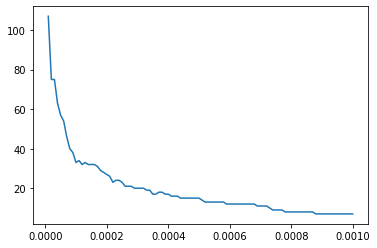

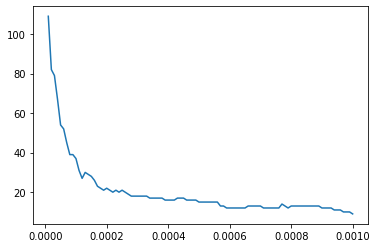

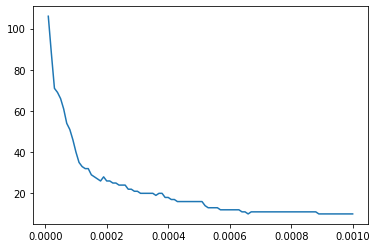

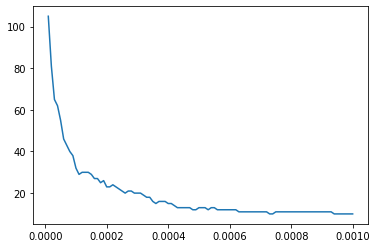

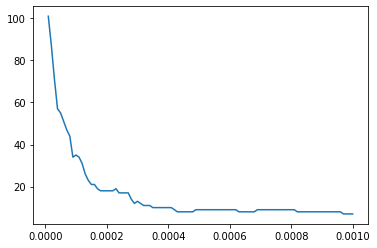

In [ ]:
from sklearn import linear_model
t={}
for x in range(5):
  al=np.linspace(0.00001,0.001,100)
  d={}
  n={}
  for a in al:
    clf = linear_model.Lasso(alpha=a,max_iter=30000)
    clf.fit(X,Y[x])
    num=0
    coeff=[]
    for i in range(len(clf.coef_)):
      if clf.coef_[i]!=0:
        num+=1
    d[a]=coeff
    n[a]=num
  print(n)
  h=[]
  v=[]
  for i in n:
    v.append(n[i])
    h.append(i)
  t[x]=v
  plt.figure(x)
  plt.plot(h,v)

In [ ]:
qq=np.array([0 for i in range(100)])
for x in range(5):
  qq=qq+np.array(t[x])

Text(0.5, 1.0, 'Feature Selection (from 256 features) ')

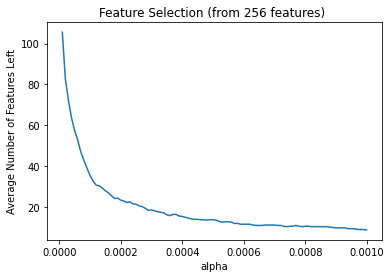

In [ ]:
plt.plot(h,qq/5)
plt.ylabel('Average Number of Features Left')
plt.xlabel('alpha')
plt.title('Feature Selection (from 256 features) ')

In [ ]:
X_train_Original=pload('final2_1')['2003-12-15':'2019-01-02'].dropna(axis=1)[:2644]

In [ ]:

a=0
d={}
n={}
coefs={}
for y in Y_trainT:
  
  clf=linear_model.Lasso(alpha=0.0005,max_iter=50000).fit(X_train_minmax,y)
  num=0
  coeff=[]
  for i in range(len(clf.coef_)):
    if abs(clf.coef_[i])!=0:
      num+=1
      coeff.append(X_train_Original.columns[i])
  d[a]=coeff
  n[a]=num
  coefs[a]=clf.coef_
  a+=1

In [ ]:
###feature names whose coefficients are not 0
d
psave(d,'005LASSOFS_1')

{0: ['1Mt-1',
  '3Mt-1',
  '6Mt-1',
  '2Yt-1',
  'EMVMONETARYPOLt-1',
  'DFFt-1',
  'EA19CLIt-1',
  'CHNCLIt-1',
  'DPRIMEt-1',
  'USJPBDSP1Yt-1',
  'US2Y-20Yt-1',
  'US7Y-10Yt-1',
  '1Y_SMA5t-1',
  '2Y_SMA5t-1',
  '3Y_SMA24_14t-1'],
 1: ['1Yt-1',
  '2Yt-1',
  '3Yt-1',
  'BOGZ1FL614090610Qt-1',
  'EMVMONETARYPOLt-1',
  'WALCLt-1',
  'DFFt-1',
  'JGB3Yt-1',
  'JGB4Yt-1',
  'MEHOINUSA672Nt-1',
  'USJPBDSP2Yt-1',
  'US3Y-10Yt-1',
  '2Y_SMA5t-1',
  '3Y_SMA5t-1',
  '2Y_SMA10t-1'],
 2: ['3Yt-1',
  '5Yt-1',
  '7Yt-1',
  'EMVMONETARYPOLt-1',
  'MICHt-1',
  'GC=Ft-1',
  'JPY=Xt-1',
  'ZB=Ft-1',
  'JGB7Yt-1',
  'BOE5Yt-1',
  'BRAdeficitt-1',
  'USJPBDSP5Yt-1',
  'USEUBDSP7Yt-1',
  'USECB5Y-ECB7Yt-1',
  '5Y_SMA5t-1',
  '7Y_SMA10t-1'],
 3: ['7Yt-1',
  '10Yt-1',
  'EA19CLIt-1',
  'DSWP30t-1',
  'USD1MTD156Nt-1',
  'JPY=Xt-1',
  'ZB=Ft-1',
  'BOE10Yt-1',
  'USJPBDSP10Yt-1',
  'USEUBDSP10Yt-1',
  '20Y_SMA5t-1',
  '10Y_SMA10t-1',
  '20Y_SMA10t-1'],
 4: ['20Yt-1',
  '30Yt-1',
  'WALCLt-1',
  'DSWP30t-1

In [ ]:
###number of features left for each targets
n
psave(n,'005LASSOFS_number')

{0: 15, 1: 15, 2: 16, 3: 13, 4: 9}

In [ ]:
###sort features by coefficient
impo={}
for a in range(5):
  num=0
  coeff=[]
  name=[]
  for i in range(len(coefs[a])):
    if coefs[a][i]!=0:
      num+=1
      coeff.append(coefs[a][i])
      name.append(X_train_Original.columns[i])
    impo[a]=[name,coeff]
print(impo)


{0: [['1Mt-1', '3Mt-1', '6Mt-1', 'USJPBDSP1Yt-1'], [0.13868798811794208, 4.711051944827621, 0.0881402078262798, 0.10723397577520613]], 1: [['1Yt-1', '2Yt-1', '3Yt-1', 'JGB3Yt-1', 'USJPBDSP2Yt-1', '2Y_SMA5t-1'], [0.15804142545838612, 3.888029975256016, 0.07601964113426754, 0.05087227208471903, 0.4299302818458987, 0.4371831745291026]], 2: [['3Yt-1', '5Yt-1', '7Yt-1', '5Y_SMA5t-1'], [0.29992162502973735, 3.690612852078525, 0.1875441198720958, 0.3431179571828281]], 3: [['7Yt-1', '10Yt-1', 'DSWP30t-1', '20Y_SMA5t-1', '20Y_SMA10t-1'], [0.4316386798471254, 3.075769395817044, 0.050850268535580924, 0.058648040910168675, 0.06779346183047949]], 4: [['20Yt-1', '30Yt-1', '30Y_SMA10t-1'], [0.1290741980359723, 2.8728213212400973, 0.08207075696921012]]}


In [ ]:
dic={}
for a in range(5):
  dic[a]=pd.DataFrame(impo[a][1],index=impo[a][0],columns=['coef'])
name=['3M','2Y','5Y','10Y','30Y']
name=['3M','2Y','5Y','10Y','30Y']
for a in range(5):
  print('\n\n',name[a])
  print(dic[a].sort_values(by=['coef'],ascending=False))
psave(dic,'FS_sort')



 3M
                       coef
3Mt-1              4.711052
1Mt-1              0.138688
USJPBDSP1Yt-1      0.107234
6Mt-1              0.088140
US2Y-20Yt-1        0.040759
DFFt-1             0.035124
DPRIMEt-1          0.021009
1Y_SMA5t-1         0.020579
2Y_SMA5t-1         0.018510
EA19CLIt-1         0.014488
2Yt-1              0.009776
US7Y-10Yt-1        0.004278
CHNCLIt-1          0.000462
3Y_SMA24_14t-1    -0.000202
EMVMONETARYPOLt-1 -0.011154


 2Y
                          coef
2Yt-1                 3.888030
2Y_SMA5t-1            0.437183
USJPBDSP2Yt-1         0.429930
1Yt-1                 0.158041
3Yt-1                 0.076020
JGB3Yt-1              0.050872
3Y_SMA5t-1            0.035045
JGB4Yt-1              0.024075
DFFt-1                0.016895
MEHOINUSA672Nt-1      0.007503
BOGZ1FL614090610Qt-1  0.005880
2Y_SMA10t-1           0.003678
US3Y-10Yt-1           0.001640
WALCLt-1             -0.001747
EMVMONETARYPOLt-1    -0.004896


 5Y
                       coef
5Yt-1     

In [ ]:
###because of minmax the data became an array, save test data with the original index from DataFrame
X_testO = all[2644:]
psave(X_testO,'X_testO')

In [ ]:
###split then normalize selected features for each targets 
from sklearn.preprocessing import MinMaxScaler
varnames=pload('005LASSOFS_1')


X_selected={}
for ii in range(5):
  all=pload('final2_1')[varnames[ii]]
  aa=all[varnames[ii]].copy()
  for t in range(2,4):
    for c in aa.columns:
      l=aa[c].to_list()
      for i in range(t):
        l.insert(0,np.nan)
      for i in range(t):
        del l[len(l)-1]
      st=c[:-1]+str(t)
      all[st]=l
  all.index=aa.index
  
  all=all['2003-12-15':'2019-01-02']
  all=all.dropna(axis=1)
  x_train_s=all[:2644]
  x_test_s=all[2644:]
  scaler = MinMaxScaler() .fit(x_train_s)
  X_train_s_minmax = scaler.transform(x_train_s)
  print(X_train_s_minmax.shape)
  X_test_s_minmax=scaler.transform(x_test_s)
  X_selected[ii]=[X_train_s_minmax,X_test_s_minmax]

###e.g.X_selected[1][0] means train set of features related to 2Y bond yield
###    X_selected[3][1] means test set of features related to 10Y bond yield
psave(X_selected,'X_selected2_3')

(2644, 45)
(2644, 45)
(2644, 48)
(2644, 39)
(2644, 27)


In [ ]:
###print index of all split point of walk train test split and walk forward validation
X_train_Original=pload('final2_1')['2003-12-15':'2019-01-02'].dropna(axis=1)[:2644]
print(X_train_Original.index[-1])
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
a=tscv.split(X_train_minmax)
for i, (train_index, test_index) in enumerate(a):
    print("Split",i)
    print("Train:",len(train_index))
    print("Train:",X_train_Original.index[train_index[-1]])
    print("Test :",len(test_index))
    print("Test:",X_train_Original.index[test_index[-1]])

2014-07-07 00:00:00
Split 0
Train: 661
Train: 2006-08-04 00:00:00
Test : 661
Test: 2009-03-26 00:00:00
Split 1
Train: 1322
Train: 2009-03-26 00:00:00
Test : 661
Test: 2011-11-10 00:00:00
Split 2
Train: 1983
Train: 2011-11-10 00:00:00
Test : 661
Test: 2014-07-07 00:00:00
